In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")
plt.figure(figsize=(12,6))

import warnings 
warnings.filterwarnings('ignore')

<Figure size 864x432 with 0 Axes>

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Analisis Deskriptif

In [49]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


## 1. Apakah rata rata umur perempuan dan laki-laki yang merokok sama?

In [16]:
gender_smoke = df[['age', 'sex', 'smoker']].where(df['smoker']=='yes').groupby(df['sex']).mean()
np.round(gender_smoke, 2)

,age
sex,
female,38.61
male,38.45


secara umum rata-rata umur laki-laki dan perempuan yang merokok tidak jauh berbeda.

## 2. Mana yang lebih tinggi, rata rata tagihan kesehatan perokok atau non merokok?

In [7]:
charges_smoker = df[['charges', 'smoker']].groupby(['smoker']).mean()
np.round(charges_smoker, 2)

,charges
smoker,
no,8434.27
yes,32050.23


Tagihan kesehatan perokok jauh lebih tinggi (280%) dibandingkan non-perokok

## 3. Mana yang lebih tinggi, rata rata tagihan kesehatan perokok yang BMI nya diatas 25 atau non perokok yang BMI nya diatas 25

In [35]:
bmi_smoker = df[['charges', 'bmi', 'smoker']].where(df['bmi']>25)
bmi_smoker.dropna(inplace=True)

In [36]:
bmi_smoker.head()

,charges,bmi,smoker
0,16884.9240,27.90,yes
1,1725.5523,33.77,no
2,4449.4620,33.00,no
4,3866.8552,28.88,no
5,3756.6216,25.74,no


In [37]:
np.round(bmi_smoker[['charges']].groupby(bmi_smoker['smoker']).mean(), 2)

,charges
smoker,
no,8629.59
yes,35116.91


Rata-rata tagihan kesehatan perokok dengan BMI > 25 lebih tinggi dibandingkan non perokok dengan BMI yang sama yakni sebesar 35116.91

## Gender apa yang memiliki BMI lebih tinggi?

In [46]:
np.round(bmi_sex.groupby(df['sex']).mean(), 2)

,bmi
sex,
female,30.38
male,30.94


Secara rata-rata BMI antara kedua gender tidak berbeda jauh, namun yang tertinggi adalah laki-laki yaitu sebesar 30.94.

## BMI mana yang lebih tinggi, seseorang perokok atau non perokok?

In [48]:
np.round(df[['bmi', 'smoker']].groupby(['smoker']).mean(), 2)

,bmi
smoker,
no,30.65
yes,30.71


BMI antara perokok ataupun non perokok tidak terlalu jauh, namun yang tertinggi sebesar 30.71 yaitu dari yang perokok.

# Analisa Variabel Diskrit

## Apakah setiap region memiliki proporsi data banyak orang yang sama?

[Text(0, 0, '325'), Text(0, 0, '364'), Text(0, 0, '325'), Text(0, 0, '324')]

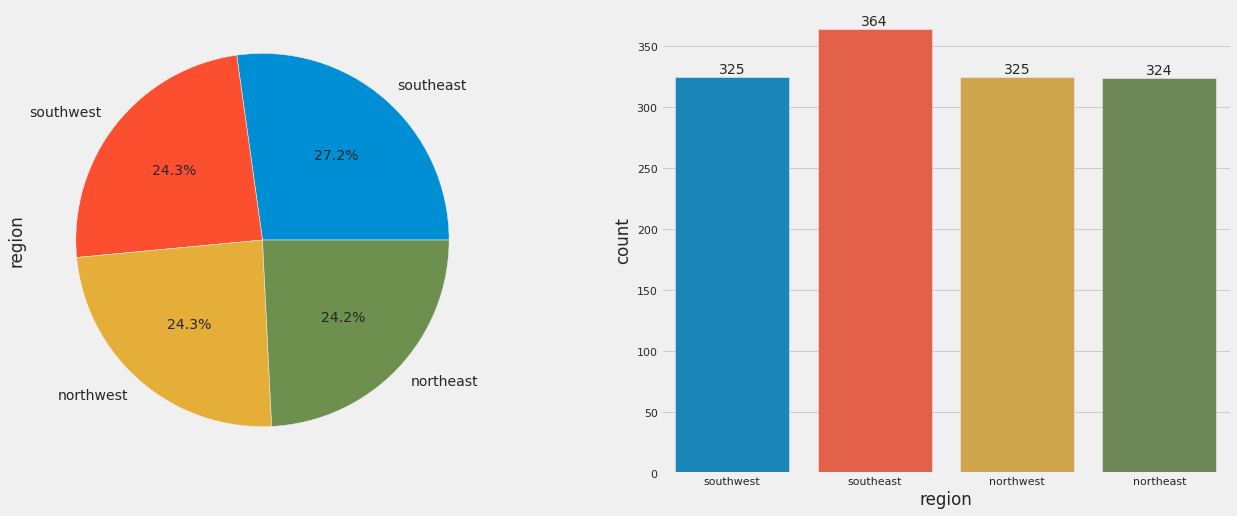

In [73]:
fig, ax = plt.subplots(1,2,figsize=(20,8))

df['region'].value_counts().plot(kind='pie',fontsize=14, autopct="%1.1f%%",ax=ax[0])
sns.countplot(x='region', data=df, ax=ax[1]).bar_label(ax[1].containers[0], label_type='edge')

Setiap region hampir memiliki proporsi data yang sama.

## Mana yang lebih tinggi proporsi perokok atau non perokok?

[Text(0, 0, '274'), Text(0, 0, '1064')]

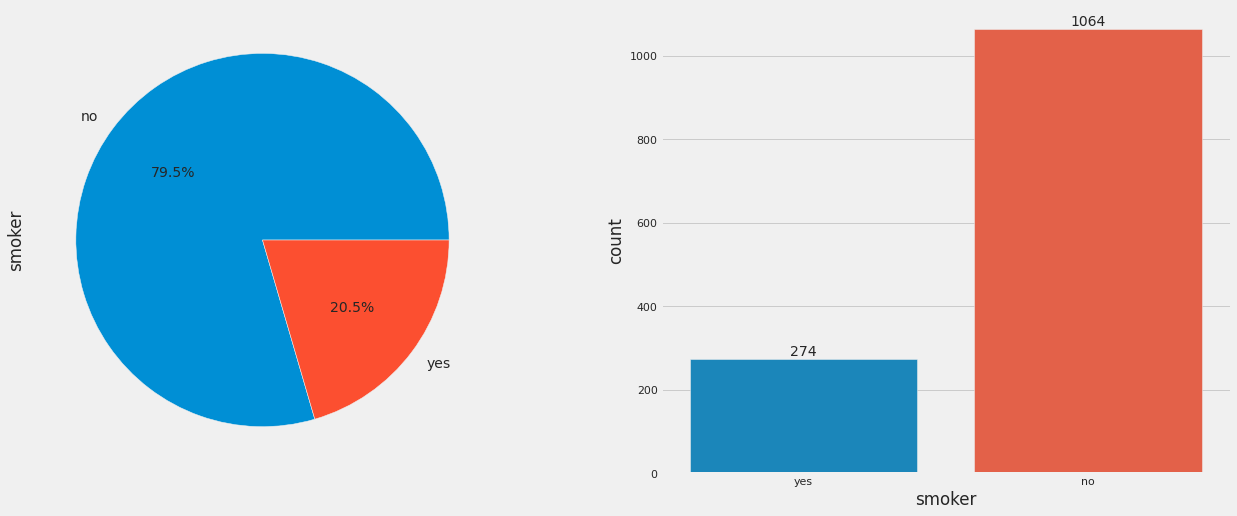

In [74]:
fig, ax = plt.subplots(1,2,figsize=(20,8))

df['smoker'].value_counts().plot(kind='pie',fontsize=14, autopct="%1.1f%%",ax=ax[0])
sns.countplot(x='smoker', data=df, ax=ax[1]).bar_label(ax[1].containers[0], label_type='edge')

## Berapa peluang seseorang tersebut adalah perempuan diketahui dia adalah perokok?

In [76]:
female_smoke = df['smoker'].where(df['sex']=='female').value_counts()
print(female_smoke)

no     547
yes    115
Name: smoker, dtype: int64


<Axes: ylabel='smoker'>

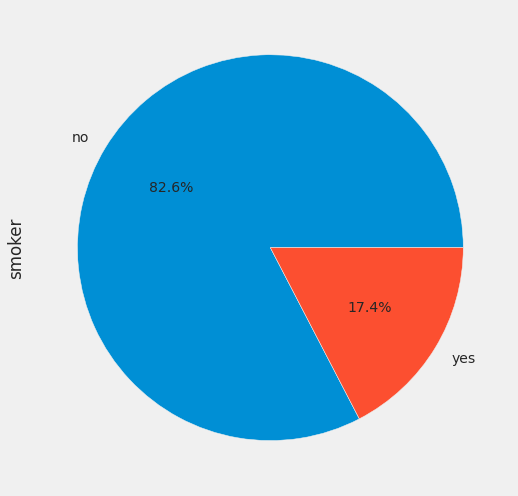

In [124]:
df['smoker'].where(df['sex']=='female').value_counts().plot(kind='pie',fontsize=14, autopct="%1.1f%%")

In [77]:
# Peluang jenis kelamin perempuan sebagai perokok adalah:
p_female_smoker = female_smoke[1] / female_smoke.sum()
print("Peluang jenis kelamin perempuan sebagai perokok adalah {}".format(np.round(p_female_smoker, 2)))

Peluang jenis kelamin perempuan sebagai perokok adalah 0.17


## Berapa peluang seseorang tersebut adalah laki-laki diketahui dia adalah perokok?

In [78]:
male_smoke = df['smoker'].where(df['sex']=='male').value_counts()
print(male_smoke)

no     517
yes    159
Name: smoker, dtype: int64


<Axes: ylabel='smoker'>

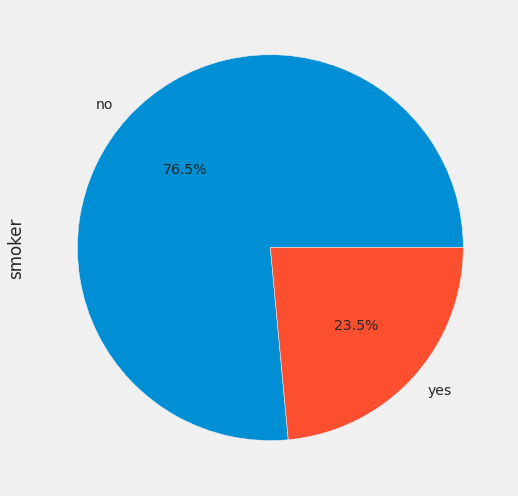

In [125]:
df['smoker'].where(df['sex']=='male').value_counts().plot(kind='pie',fontsize=14, autopct="%1.1f%%")

In [79]:
p_male_smoker = male_smoke[1] / male_smoke.sum()
print("Peluang jenis kelamin laki-laki sebagai perokok adalah {}".format(np.round(p_male_smoker, 2)))

Peluang jenis kelamin laki-laki sebagai perokok adalah 0.24


## Bagaimana bentuk distribusi peluang besar tagihan dari tiap-tiap region?

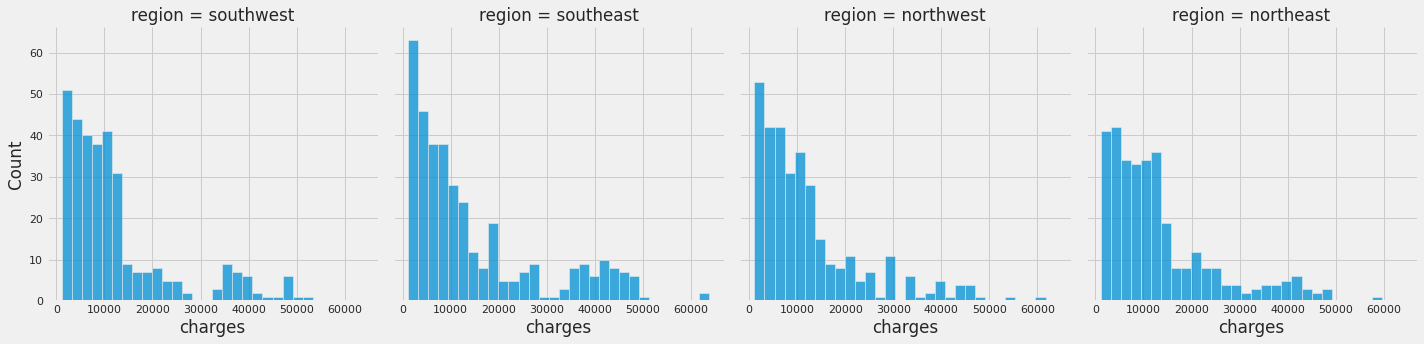

In [80]:
sns.displot(df, x='charges', col='region')

# Analisis Variabel Kontinu

## 1. Mana yang lebih mungkin terjadi</br>

- Seseorang dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k, atau
- Seseorang dengan BMI dibawah 25 mendapatkan tagihan kesehatan diatas 16.7k

### Seseorang dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k, atau

In [82]:
# 1. Jumlah sample yaitu orang dengan tagihan kesehatan > 16.7K
jumlah_sample = df[df['charges']>16700].value_counts().sum()
print("Jumlah orang mendapatkan tagihan kesehatan > 16.7K: {}".format(jumlah_sample))

# 2. Jumlah orang dengan bmi > 25 dan charges > 16.7K
jumlah_1 = df.where((df['bmi']>25) & (df['charges']>16700)).value_counts().sum()
print("Distribusi orang dengan BMI > 25 dan mendapatkan tagihan kesehatan > 16.7K: {}".format(jumlah_1))

# 3. Probability orang dengan bmi > 25 dan charges > 16.7K
p_jumlah_1 = jumlah_1 / jumlah_sample
print("Probability jumlah orang dengan BMI > 25 dan mendapatkan tagihan kesehatan > 16.7K: {}".format(np.round(p_jumlah_1, 2)))

Jumlah orang mendapatkan tagihan kesehatan > 16.7K: 334
Distribusi orang dengan BMI > 25 dan mendapatkan tagihan kesehatan > 16.7K: 283
Probability jumlah orang dengan BMI > 25 dan mendapatkan tagihan kesehatan > 16.7K: 0.85


### Seseorang dengan BMI dibawah 25 mendapatkan tagihan kesehatan diatas 16.7k

In [84]:
# 1. Jumlah sample yaitu orang dengan tagihan kesehatan > 16.7K
jumlah_sample = df[df['charges']>16700].value_counts().sum()
print("Jumlah orang mendapatkan tagihan kesehatan > 16.7K: {}".format(jumlah_sample))

# 2. Jumlah oragn dengan bmi < 25 dan charges > 16700
jumlah_1 = df.where((df['bmi']<25) & (df['charges']>16700)).value_counts().sum()
print("Distribusi orang dengan BMI < 25 dan mendapatkan tagihan kesehatan > 16.7K: {}".format(jumlah_1))

# 3. Probability orang dengan bmi < 25 dan charges > 16700
p_jumlah_1 = jumlah_1 / jumlah_sample
print("Probability jumlah orang dengan BMI < 25 dan mendapatkan tagihan kesehatan > 16.7K: {}".format(np.round(p_jumlah_1, 2)))

Jumlah orang mendapatkan tagihan kesehatan > 16.7K: 334
Distribusi orang dengan BMI < 25 dan mendapatkan tagihan kesehatan > 16.7K: 51
Probability jumlah orang dengan BMI < 25 dan mendapatkan tagihan kesehatan > 16.7K: 0.15


Jadi, yang paling mungkin terjadi adalah orang dengan BMI > 25 dan mendapatkan tagihan kesehatan > 16.7K dengan probabilitas sebesar 0.85, di mana bisa juga dikatakan bahwa 8 dari 10 orang dengan BMI lebih dari 25 memiliki tagihan kesehatan lebih dari 16.7K.

## 2. Mana yang lebih mungkin terjadi</br>

- Seseorang perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k, atau
- Seseorang non perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k

### Seseorang perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k

In [86]:
# 1. Jumlah sample yaitu orang dengan BMI > 25 dan tagihan kesehatan > 16.7K
jumlah_sample = df[df['bmi']>25].where(df['charges']>16700).value_counts().sum()
print("Jumlah orang dengan BMI > 25 dan mendapatkan tagihan kesehatan > 16.7K: {}".format(jumlah_sample))

# 2. Jumlah orang di mana smoker=='yes' dan bmi > 25 dan charges > 16.7
jumlah_1 = df.where((df['smoker']=='yes') & (df['bmi']>25) & (df['charges']>16700)).value_counts().sum()
print("Distribusi orang perokok dengan BMI > 25 dan mendapatkan tagihan kesehatan > 16.7K: {}".format(jumlah_1))

# Probability 
p_jumlah_1 = jumlah_1 / jumlah_sample
print("Probability jumlah orang perokok dengan BMI > 25 dan mendapatkan tagihan kesehatan > 16.7K: {}".format(np.round(p_jumlah_1, 2)))

Jumlah orang dengan BMI > 25 dan mendapatkan tagihan kesehatan > 16.7K: 283
Distribusi orang perokok dengan BMI > 25 dan mendapatkan tagihan kesehatan > 16.7K: 215
Probability jumlah orang perokok dengan BMI > 25 dan mendapatkan tagihan kesehatan > 16.7K: 0.76


### Seseorang non perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k

In [87]:
# 1. Jumlah sample yaitu orang dengan BMI > 25 dan tagihan kesehatan > 16.7K
jumlah_sample = df[df['bmi']>25].where(df['charges']>16700).value_counts().sum()
print("Jumlah orang dengan BMI > 25 dan mendapatkan tagihan kesehatan > 16.7K: {}".format(jumlah_sample))

# 2. Jumlah orang di mana smoker=='no' dan bmi > 25 dan charges > 16.7
jumlah_1 = df.where((df['smoker']=='no') & (df['bmi']>25) & (df['charges']>16700)).value_counts().sum()
print("Distribusi orang non perokok dengan BMI > 25 dan mendapatkan tagihan kesehatan > 16.7K: {}".format(jumlah_1))

# Probability 
p_jumlah_1 = jumlah_1 / jumlah_sample
print("Probability jumlah orang non perokok dengan BMI > 25 dan mendapatkan tagihan kesehatan > 16.7K: {}".format(np.round(p_jumlah_1, 2)))

Jumlah orang dengan BMI > 25 dan mendapatkan tagihan kesehatan > 16.7K: 283
Distribusi orang non perokok dengan BMI > 25 dan mendapatkan tagihan kesehatan > 16.7K: 68
Probability jumlah orang non perokok dengan BMI > 25 dan mendapatkan tagihan kesehatan > 16.7K: 0.24


# Analisis Korelasi Variabel

<Axes: >

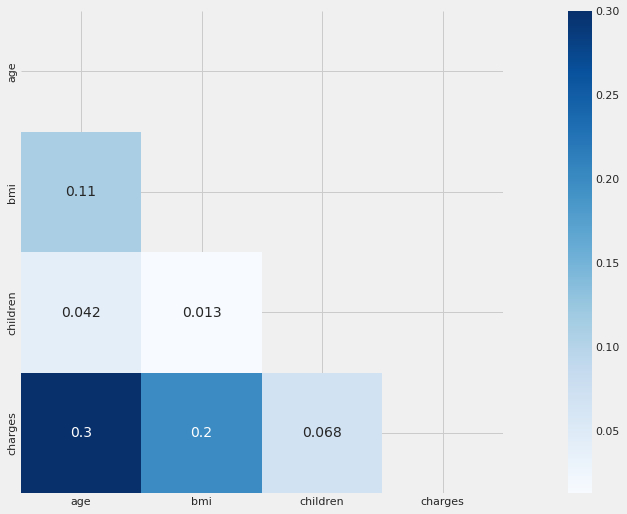

In [97]:
data_corr = df[['age', 'bmi', 'children', 'charges']].corr(method='pearson')
mask = np.triu(np.ones_like(data_corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(data_corr, mask=mask, cmap='Blues', vmax=0.3, square=True, annot=True)

# Pengujian Hipotesis

## 1. Tagihan kesehatan perokok lebih tinggi daripada tagihan kesehatan non perokok

- H0: Perokok memiliki tagihan kesehatan > daripada tagihan non perokok
- H1: Perokok memiliki tagihan kesehatan <= daripada tagihan non perokok
- alpha: 5%

In [100]:
# Tentukan populasinya
# 1. Sampel Tagihan Perokok
jml_perokok = df[df['smoker']=='yes'].value_counts().sum()
print("Jumlah perokok: {} orang".format(jml_perokok))

# 2. Sampel Tagihan non perokok
jml_non_perokok = df[df['smoker']=='no'].value_counts().sum()
print("Jumlah non perokok: {} orang".format(jml_non_perokok))
print("Jumlah keseluruhan sampel: {}".format(df.shape[0]))

# Tentukan rata-rata charges(tagihan) dari kedua sampel
print("\nRata-rata tagihan pada perokok dan non perokok: ")
mu = df[['charges']].groupby(df['smoker']).mean()
display(mu)
mu1 = mu['charges']['no']
mu2 = mu['charges']['yes']

Jumlah perokok: 274 orang
Jumlah non perokok: 1064 orang
Jumlah keseluruhan sampel: 1338

Rata-rata tagihan pada perokok dan non perokok: 


,charges
smoker,
no,8434.268298
yes,32050.231832


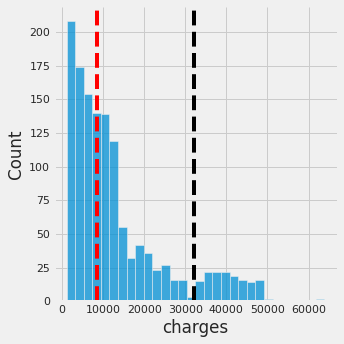

In [102]:
# Plot distribusi charges di seluruh populasi
sns.displot(df, x='charges')
plt.axvline(x=mu1, linestyle='--', c='red', label='mean tagihan non perokok')
plt.axvline(x=mu2, linestyle='--', c='black', label='mean tagihan perokok')

Berdasarkan grafik di atas terlihat bahwa bentuk distribusi data adalah positive-skew. Maka dari itu kita perlu menormalkan distribusi charges dengan mengeluarkan data outlier dari distribusi. Dari grafik terlihat bahwa outlier dimulai dari data charges dengan nilai di atas 15K.

Jumlah sampel sekarang menjadi: 980
Jumlah sampel baru perokok: 7 orang
Jumlah sampel baru non perokok: 973 orang

Rata-rata tagihan pada perokok dan non perokok: 


,charges
smoker,
no,7062.200064
yes,14063.510214


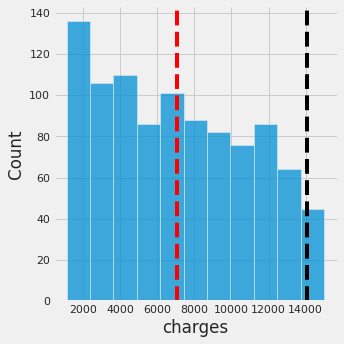

In [105]:
# Filter data tagihan, gunakan tagihan (charges) < 15K
data_charges = df[df['charges']<15000]
print("Jumlah sampel sekarang menjadi: {}".format(data_charges.shape[0]))

# Sampel Baru Tagihan Perokok
jml_perokok = data_charges.where(df['smoker']=='yes').value_counts().sum()
print("Jumlah sampel baru perokok: {} orang".format(jml_perokok))

# Sampel Baru Tagihan non perokok
jml_non_perokok = data_charges.where(df['smoker']=='no').value_counts().sum()
print("Jumlah sampel baru non perokok: {} orang".format(jml_non_perokok))

# Tentukan rata-rata charges(tagihan) dari kedua populasi
print("\nRata-rata tagihan pada perokok dan non perokok: ")
mu = data_charges[['charges']].groupby(df['smoker']).mean()
display(mu)
mu1 = mu['charges']['no']
mu2 = mu['charges']['yes']

sns.displot(data_charges, x='charges')
plt.axvline(x=mu1, linestyle='--', c='red', label='mean tagihan non perokok')
plt.axvline(x=mu2, linestyle='--', c='black', label='mean tagihan perokok')

In [106]:
# Pisahkan sampel tagihan perokok dengan non-perokok
tagihan_smoker = data_charges['charges'].where(df['smoker']=='yes').dropna()
tagihan_non_smoker = data_charges['charges'].where(df['smoker']=='no').dropna()

**Langkah 2: Hitung Statistik Uji**

Pada kasus ini digunakan statistik Uji T.

**Langkah 3: Menentukan aturan keputusan**

Aturan keputusan didasarkan pada nilai spesifik dari statistik uji (misal, tolak H0 jika Z > 1.645). Karena pada H1 mengandung tanda "<", maka disini dilakukan Lower-tailed test. Dalam uji pihak kiri, aturan keputusan memiliki aturan menolak H0 jika statistik uji lebih kecil dari nilai kritis.

**Langkah 4: Menentukan Kritikal Value**

In [107]:
print("Varian Tagihan Perokok: {}".format(tagihan_smoker.var()))
print("Varian Tagihan non Perokok: {}".format(tagihan_non_smoker.var()))

# Langkah 2 s/d 4 diimplementasikan sekaligus
from scipy.stats import ttest_ind

# Lakukan statistik uji T dan hitung p_value
test_stats, p_value = ttest_ind(a=tagihan_smoker, b=tagihan_non_smoker, equal_var=False, alternative='less')
print("Hasil Uji T: {}".format(test_stats))
print("P-value: {}".format(p_value))

Varian Tagihan Perokok: 425214.3872213427
Varian Tagihan non Perokok: 14731102.73855582
Hasil Uji T: 25.41569223937772
P-value: 0.9999999997042908


**Langkah 5: Membuat Keputusan**

Ada dua bentuk umum yang dapat diambil dari hasil uji hipotesis statistik.
- p-value.</br>
Nilai P digunakan dalam pengujian hipotesis untuk membantu memutuskan apakah akan menolak hipotesis nol.
Nilai p-value adalah bukti terhadap hipotesis nol. Semakin kecil nilai p-value, semakin kuat bukti bahwa kita harus menolak hipotesis nol.
- critical value</br>
Nilai batas yang digunakan untuk menandai dimulainya suatu wilayah di mana statistik uji, yang diperoleh dalam pengujian hipotesis, tidak mungkin jatuh.
Nilai kritis dibandingkan dengan statistik uji yang diperoleh untuk menentukan apakah hipotesis nol harus ditolak atau tidak.
Statistik uji < Critical value: Hasil tidak signifikan, gagal menolak H0.
Statistik uji >= Critical value: Hasil signifikan, tolak hipotesis H0.

In [109]:
alpha = 0.05
if p_value > alpha:
    print("Gagal tolak H0")
else:
    print("Tolak H0")

Gagal tolak H0


Berdasarkan keputusan yang didapatkan, maka kesimpulan dari pengujian hipotesis yang sudah dilakukan adalah **Tagihan kesehatan perokok lebih tinggi daripada tagihan kesehatan non perokok.**

## 2. Tagihan kesehatan dengan BMI diatas 25 lebih tinggi daripada tagihan kesehatan dengan BMI dibawah 25

**Hipotesis**

- H0: Tagihan kesehatan dengan BMI di atas 25 > Tagihan kesehatan dengan BMI di bawah 25.
- H1: Tagihan kesehatan dengan BMI di atas 25 < Tagihan kesehatan dengan BMI di bawah 25.
- alpha: 5%</br>

Kasus ini mirip dengan penyelesaian pada Hipotesis #1, di mana kondisi distribusi data tagihan (charges) adalah positiven skew. Maka dari itu kita bisa mengabaikan data outlier untuk kemudian masuk ke statistik uji.

Jumlah sampel sekarang menjadi: 980
Jumlah sampel tagihan dengan BMI>25: 793 orang
Jumlah sampel tagihan dengan BMI<=25: 187 orang

Rata-rata tagihan pada BMI>25 dan BMI<=25: 


,charges
bmi,
False,6733.691762
True,7201.468947


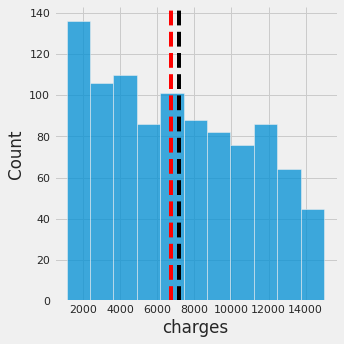

In [112]:
# Filter data tagihan, gunakan tagihan (charges) < 15K
data_charges = df[df['charges']<15000]
print("Jumlah sampel sekarang menjadi: {}".format(data_charges.shape[0]))

# Sampel Baru Tagihan BMI>25
bmi_g25_tagihan = data_charges.where(df['bmi']>25).value_counts().sum()
print("Jumlah sampel tagihan dengan BMI>25: {} orang".format(bmi_g25_tagihan))

# Sampel Baru Tagihan BMI<25
bmi_l25_tagihan = data_charges.where(df['bmi']<=25).value_counts().sum()
print("Jumlah sampel tagihan dengan BMI<=25: {} orang".format(bmi_l25_tagihan))

# Tentukan rata-rata charges(tagihan) dari kedua populasi
print("\nRata-rata tagihan pada BMI>25 dan BMI<=25: ")
mu = data_charges[['charges']].groupby(df['bmi']>25).mean()
display(mu)
mu1 = mu['charges'][0]
mu2 = mu['charges'][1]

sns.displot(data_charges, x='charges')
plt.axvline(x=mu1, linestyle='--', c='red', label='mean tagihan')
plt.axvline(x=mu2, linestyle='--', c='black', label='mean tagihan')

In [113]:
# Pisahkan sampel tagihan dengan BMI> dan BMI<=25
bmi_g25 = data_charges['charges'].where(df['bmi']>25).dropna()
bmi_l25 = data_charges['charges'].where(df['bmi']<=25).dropna()
print("Varian Tagihan BMI>25: {}".format(bmi_g25.var()))
print("Varian Tagihan BMI<=25: {}".format(bmi_l25.var()))
equal_var = True if bmi_g25.var()==bmi_l25.var() else False
print("Apakah varian kedua sampel sama? {}".format(equal_var))

Varian Tagihan BMI>25: 14659959.63403945
Varian Tagihan BMI<=25: 16226139.93278577
Apakah varian kedua sampel sama? False


In [114]:
#Lakukan Statistik Uji T dan Hitung p_value

alpha = 0.05
test_stats, p_value = ttest_ind(a=bmi_g25, b=bmi_l25, equal_var=equal_var, alternative='less')
print("Hasil Uji T: {}".format(test_stats))
print("P-value: {}".format(p_value))

if p_value > alpha:
    print("Gagal tolak H0")
else:
    print("Tolak H0")

Hasil Uji T: 1.4418247938478395
P-value: 0.9247463946839116
Gagal tolak H0


Berdasarkan keputusan yang didapatkan, maka kesimpulan dari pengujian hipotesis yang sudah dilakukan adalah **Tagihan kesehatan orang dengan BMI lebih tinggi dari 25 lebih besar daripada orang yang BMI-nya di bawah 25.**

## 3. Tagihan kesehatan laki-laki lebih besar dari perempuan

Hipotesis:

- H0: Tagihan kesehatan laki-laki > tagihan kesehatan perempuan
- H1: Tagihan kesehatan laki-laki <= tagihan kesehatan perempuan
- alpha: 5%

Jumlah sampel sekarang menjadi: 980
Jumlah sampel tagihan pada gender laki-laki: 477 orang
Jumlah sampel tagihan pada gender perempuan: 503 orang

Rata-rata Tagihan pada Laki-laki dan Perempuan: 


,charges
sex,
female,7412.722165
male,6795.316531


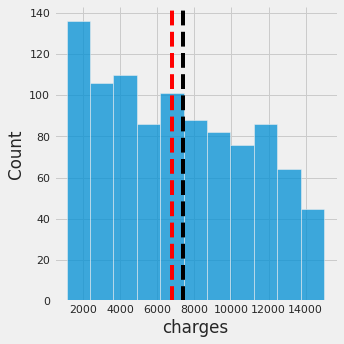

In [118]:
# Filter data tagihan, gunakan tagihan (charges) < 15K
data_charges = df[df['charges']<15000]
print("Jumlah sampel sekarang menjadi: {}".format(data_charges.shape[0]))

# Sampel Baru Tagihan Laki-laki
tagihan_laki = data_charges.where(df['sex']=='male').value_counts().sum()
print("Jumlah sampel tagihan pada gender laki-laki: {} orang".format(tagihan_laki))

# Sampel Baru Tagihan Perempuan
tagihan_perempuan = data_charges.where(df['sex']=='female').value_counts().sum()
print("Jumlah sampel tagihan pada gender perempuan: {} orang".format(tagihan_perempuan))

# Tentukan rata-rata charges(tagihan) dari kedua sampel
print("\nRata-rata Tagihan pada Laki-laki dan Perempuan: ")
mu = data_charges[['charges']].groupby(df['sex']).mean()
display(mu)
mu1 = mu['charges']['male']
mu2 = mu['charges']['female']

sns.displot(data_charges, x='charges')
plt.axvline(x=mu1, linestyle='--', c='red', label='mean tagihan')
plt.axvline(x=mu2, linestyle='--', c='black', label='mean tagihan')

In [119]:
# Pisahkan sampel tagihan pada gender laki-laki dan perempuan
male = data_charges['charges'].where(df['sex']=='male').dropna()
female = data_charges['charges'].where(df['sex']=='female').dropna()
print("Varian Tagihan Laki-laki: {}".format(male.var()))
print("Varian Tagihan Perempuan: {}".format(female.var()))
equal_var = True if male.var()==female.var() else False
print("Apakah varian kedua sampel sama? {}".format(equal_var))

Varian Tagihan Laki-laki: 14837873.420394791
Varian Tagihan Perempuan: 14951607.858448775
Apakah varian kedua sampel sama? False


In [120]:
# Uji statistik T dan P_value
alpha = 0.05
test_stats, p_value = ttest_ind(a=male, b=female, equal_var=equal_var, alternative='less')
print("Hasil Uji T: {}".format(test_stats))
print("P-value: {}".format(p_value))

if p_value > alpha:
    print("Gagal tolak H0")
else:
    print("Tolak H0")

Hasil Uji T: -2.5032617062621183
P-value: 0.006233964666790543
Tolak H0


Berdasarkan keputusan yang didapatkan, maka kesimpulan dari pengujian hipotesis yang sudah dilakukan adalah **Tagihan kesehatan laki-laki tidak lebih besar daripada tagihan kesehatan perempuan.**